In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("nba.csv")

In [26]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [28]:
df.shape

(458, 9)

In [29]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# for col in df:
#     if df[col].dtypes == "object":
#         df[col] = le.fit_transform(df[col])
# df

In [31]:
df.drop(index=457, axis = 0, inplace=True)

In [32]:
df.isna().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [34]:
df.dropna(subset=['College'], inplace=True)

In [35]:
df.isna().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      9
dtype: int64

In [36]:
df["Salary"].fillna(df["Salary"].mean(), inplace=True)

In [37]:
df.isna().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [38]:
df.groupby("Age")["Salary"].mean()

Age
19.0    1.930440e+06
20.0    2.616956e+06
21.0    2.113412e+06
22.0    2.465265e+06
23.0    2.214687e+06
24.0    3.983929e+06
25.0    3.739204e+06
26.0    6.902746e+06
27.0    6.586193e+06
28.0    5.269156e+06
29.0    6.474488e+06
30.0    6.415726e+06
31.0    7.081688e+06
32.0    8.772865e+06
33.0    3.096028e+06
34.0    6.817141e+06
35.0    3.108184e+06
36.0    2.164577e+06
37.0    4.810156e+06
38.0    1.515388e+06
39.0    4.088019e+06
40.0    2.750375e+06
Name: Salary, dtype: float64

In [40]:
pd.cut(df["Age"], bins=range(15, 45, 5))

0      (20, 25]
1      (20, 25]
2      (25, 30]
3      (20, 25]
6      (20, 25]
         ...   
449    (20, 25]
451    (25, 30]
452    (15, 20]
453    (25, 30]
456    (25, 30]
Name: Age, Length: 373, dtype: category
Categories (5, interval[int64, right]): [(15, 20] < (20, 25] < (25, 30] < (30, 35] < (35, 40]]

In [41]:
df["Age"] = pd.cut(df["Age"], bins=range(15, 45, 5))

In [48]:
df.groupby("Age")["Salary"].mean()

Age
(15, 20]    2.536190e+06
(20, 25]    3.140665e+06
(25, 30]    6.346138e+06
(30, 35]    6.055065e+06
(35, 40]    2.543320e+06
Name: Salary, dtype: float64

In [50]:
df.groupby("Age")["Salary"].min()

Age
(15, 20]    525093.0
(20, 25]     55722.0
(25, 30]     55722.0
(30, 35]    200600.0
(35, 40]    222888.0
Name: Salary, dtype: float64

<Axes: xlabel='Age'>

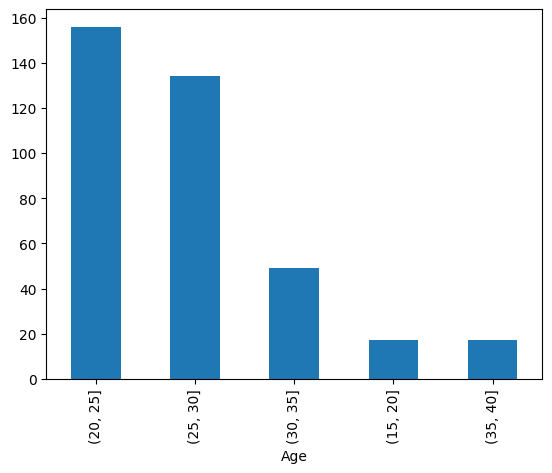

In [54]:
df["Age"].value_counts().plot(kind="bar")